### Modelo Black-Sholes: Ejercicio sintético

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

In [2]:
#Parámetros
sigma = 0.1917 #volatilidad
q = 0.037
r = -0.00088
k1 = 3170.73
k2 = 4121.95
St = np.linspace(1585,4756, 42)
t = np.arange(1,1098,27)
i = 0.0558

tt, Stt = np.meshgrid(t,St)
T = (1098-tt)/365

In [3]:
d1 = (np.log(Stt/k1)+(r-q+(sigma*sigma)/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
d12 = (np.log(Stt/k2) + (r-q+(sigma*sigma)/2)*T)/(sigma*np.sqrt(T))
d22 = d12 - sigma*np.sqrt(T)

In [4]:
z1 = Stt*np.exp(-q*T) * stats.norm.cdf(d1) - k1*np.exp(-r*T)*stats.norm.cdf(d2)
z2 = Stt*np.exp(-q*T) * stats.norm.cdf(d12) - k2*np.exp(-r*T)*stats.norm.cdf(d22)

In [5]:
z = (z1*100/k1)-(z2*100/k1) + 100 * np.power((1 + i ), -T)

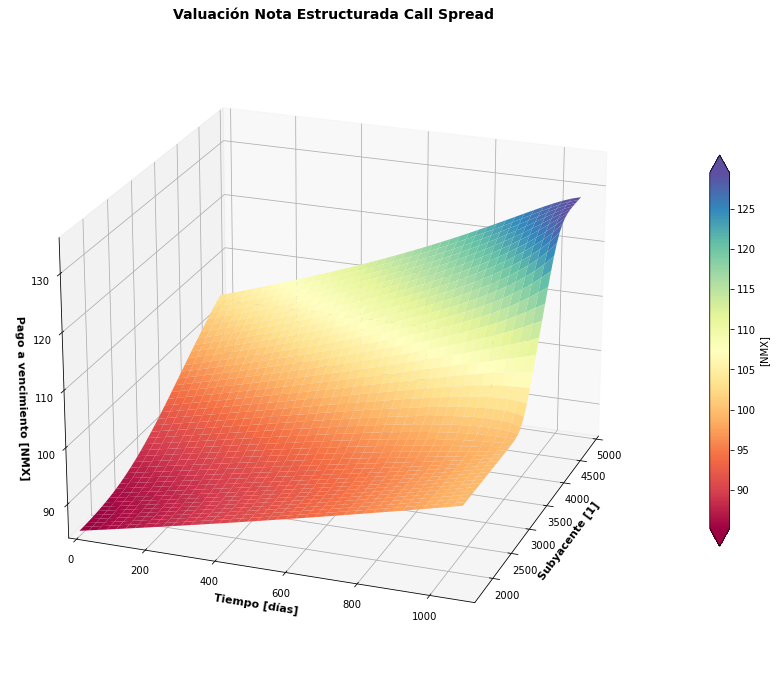

In [6]:
fig = plt.figure(figsize = [18,12])
ax = fig.gca(projection='3d')

surf = ax.plot_surface(Stt, tt, z, alpha=1, cmap='Spectral')
#ax.contour(Stt, tt, z, alpha=1, zdir='y', cmap='Spectral')

ax.view_init(elev=22, azim=20)

ax.set_ylabel('Tiempo [días]' , fontsize=11, weight = 'bold')
ax.set_xlabel('Subyacente [1]' , fontsize=11, weight = 'bold')
ax.set_zlabel('Pago a vencimiento [NMX]', fontsize=11, weight = 'bold')
ax.set_title('Valuación Nota Estructurada Call Spread', fontsize = 14, weight = 'bold')
ax.set_xlim(5000,1600)
ax.set_ylim(0,1100)
ax.set_zlim(85,135)
cbar = fig.colorbar(surf, shrink=0.6, aspect=18,extend='both', pad = 0.05)
cbar.ax.set_ylabel('[NMX]')

#plt.savefig('surf_call-spread-01.png', transparent=False, dpi=600, bbox_inches='tight')

plt.show()

In [7]:
df_r = pd.read_csv('valor_r.csv')

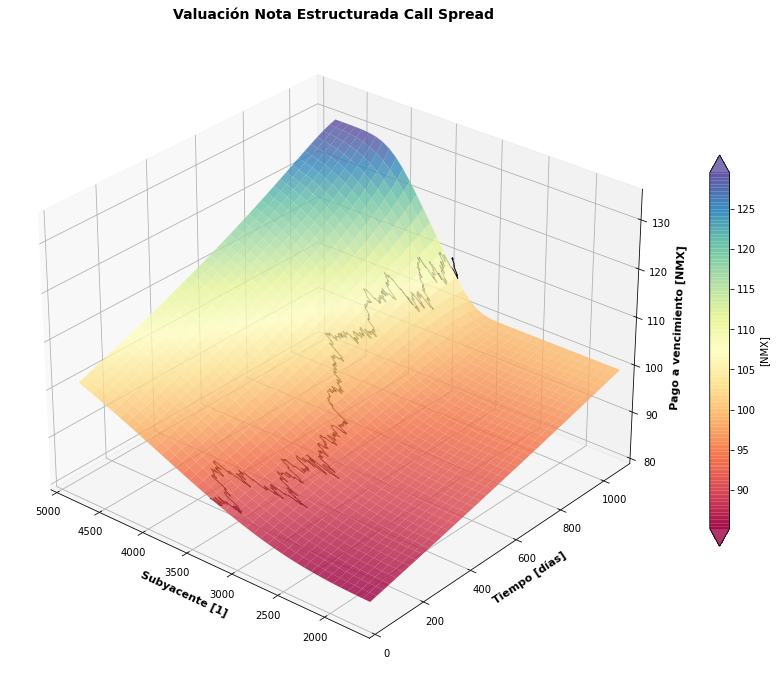

In [8]:
fig = plt.figure(figsize = [18,12])
ax = fig.gca(projection='3d')

ax.plot(df_r['sx5e'], df_r['tiempo'] ,  df_r['ne'], 'k-', lw=1, alpha = 1)
surf = ax.plot_surface(Stt, tt, z, alpha=0.8, cmap='Spectral')

#ax.contour(Stt, tt, z, alpha=1, zdir='y', cmap='Spectral')

ax.view_init(elev=29, azim=-50)

ax.set_ylabel('Tiempo [días]' , fontsize=11, weight = 'bold')
ax.set_xlabel('Subyacente [1]' , fontsize=11, weight = 'bold')
ax.set_zlabel('Pago a vencimiento [NMX]', fontsize=11, weight = 'bold')
ax.set_title('Valuación Nota Estructurada Call Spread', fontsize = 14, weight = 'bold')
ax.set_xlim(5000,1600)
ax.set_ylim(0,1100)
ax.set_zlim(80,135)
cbar = fig.colorbar(surf, shrink=0.6, aspect=18,extend='both', pad = 0.05)
cbar.ax.set_ylabel('[NMX]')
#plt.savefig('surf_call-spread-02.png', transparent=False, dpi=600, bbox_inches='tight')

plt.show()

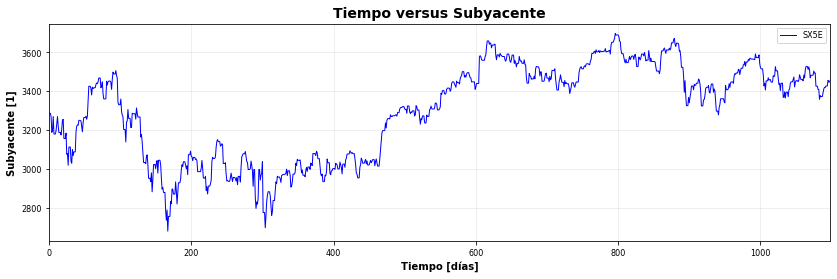

In [9]:
fig = plt.figure(figsize = [14, 4])

_ = plt.plot(df_r['tiempo'] ,  df_r['sx5e'], 'b-', lw=1, alpha = 1, label='SX5E')
_ = plt.xlabel('Tiempo [días]', fontsize = 10, weight = 'semibold')
_ = plt.ylabel('Subyacente [1]', fontsize = 10, weight = 'semibold')
_ = plt.xticks(color='k', fontsize=8)
_ = plt.yticks(color ='k', fontsize=8)
_ = plt.xlim(0,1098)
_ = plt.legend(fontsize=8)
_= plt.title('Tiempo versus Subyacente', fontsize=14, weight='semibold')

_ = plt.grid(True, lw = 0.7, alpha = 0.3, ls = '-')
#plt.savefig('plano-call-spread-01.png', transparent=False, dpi=600, bbox_inches='tight')

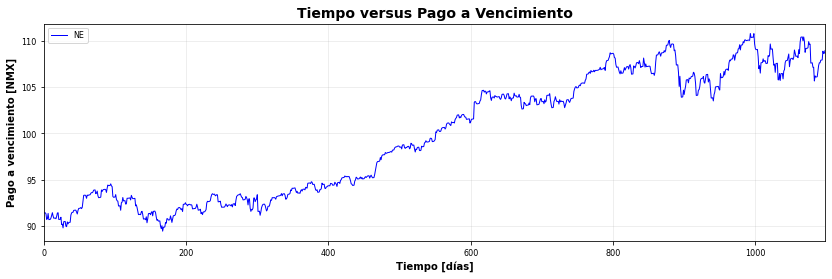

In [10]:
fig = plt.figure(figsize = [14, 4])

_ = plt.plot(df_r['tiempo'], df_r['ne'],  'b-', lw=1, alpha =1, label = 'NE')
_ = plt.xlabel('Tiempo [días]', fontsize = 10, weight = 'semibold')
_ = plt.ylabel('Pago a vencimiento [NMX]', fontsize = 10, weight = 'semibold')
_ = plt.xticks(color='k', fontsize=8)
_ = plt.yticks(color ='k', fontsize=8)
_ = plt.xlim(0,1098)
_ = plt.legend(fontsize=8)
_= plt.title('Tiempo versus Pago a Vencimiento', fontsize=14, weight='semibold')
_ = plt.grid(True, lw = 0.7, alpha = 0.3, ls = '-')

#plt.savefig('plano-call-spread-02.png', transparent=False, dpi=600, bbox_inches='tight')